L’objectif est ici d'etudier un cas préesentant un problème de prédiction que ce soit dans le cadre de
la régression ou de la catégorisation. Vous devrez pour cela implémenter le code permettant de mettre
en oeuvre les points suivants :

— La lecture des données (que vous fournirez avec votre dossier en format .csv ou .xls ou .RData).
— Le pré-traitement des données si nécessaire.

— La validation croisée permettant d’évaluer les performances des méthodes suivantes :
— Modèle linéaire pénalisé par une fonction de régularisation elasticnet.
— Réseau de neuronnes avec une couche cachée.
— SVM.

— Autre m´ethode de votre choix sortant des techniques vues en cours (optionel).
Pour chaque type de méthode, vous testerez plusieurs ensembles de paramètres.


— Des graphiques permettant de comparer les résultats de chaque méthode avec les différents paramètres utilisés.
— Des graphiques permettant de comparer les meilleurs modèles des trois types de méthodes.

## Lecture des données

Notre jeu de données porte sur les haricots secs. 

Il comporte 13 611 observations (grains) pour 7 espèces différentes sur lesquelles nous souhaitons faire de la classification.

Les données ont été obtenues après des étapes de segmentation et d'extraction de caractéristiques sur des images prises par un système de vision par ordinateur utilisant une caméra haute résolution.

Les variables explicatives sont au nombre de 16 et sont relatives aux caractéristiques des grains : 

1.) Area (A): La surface d'une zone de haricot et le nombre de pixels à l'intérieur de ses limites.

2.) Perimeter (P): La circonférence d'un haricot est définie comme la longueur de sa bordure.

3.) Major axis length (L): La distance entre les extrémités de la ligne la plus longue qui peut être tracée à partir d'un haricot.

4.) Minor axis length (l): La plus longue ligne que l'on peut tracer à partir d'un haricot en étant perpendiculaire à l'axe principal.

5.) Aspect ratio (K): Définit la relation entre L et l.

6.) Eccentricity (Ec): Excentricité de l'ellipse ayant les mêmes moments que la région.

7.) Convex area (C): Nombre de pixels dans le plus petit polygone convexe qui peut contenir la surface d'une graine de haricot.

8.) Equivalent diameter (Ed): Le diamètre d'un cercle ayant la même surface que celle d'une graine de haricot.

9.) Extent (Ex): Le rapport entre les pixels de la boîte englobante et la surface du haricot.

10.) Solidity (S): Le rapport entre les pixels de la coquille convexe et ceux que l'on trouve dans les haricots.

11.) Roundness (R): Calculée à l'aide de la formule suivante : (4piA)/(P^2)

12.)Compactness (CO): Mesure la rondeur d'un objet : Ed/L

13.)ShapeFactor1 (SF1) = L/A

14.)ShapeFactor2 (SF2) = l/A

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.) Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [2]:
library(xlsx)
library(ggplot2)
library(lessR)
library(Hmisc)
library(dplyr)

Warning message:
"package 'xlsx' was built under R version 4.1.2"
Warning message:
"package 'lessR' was built under R version 4.1.2"

lessR 4.1.3  feedback: gerbing@pdx.edu  web: lessRstats.com/new
---------------------------------------------------------------
> d <- Read("")   Read text, Excel, SPSS, SAS, or R data file
  d is default data frame, data= in analysis routines optional

Learn about reading, writing, and manipulating data, graphics,
testing means and proportions, regression, factor analysis,
customization, and descriptive statistics from pivot tables.
  Enter:  browseVignettes("lessR")

View changes in this new version of lessR.
  Enter: help(package=lessR)  Click: Package NEWS
  Enter: interact()  for access to interactive graphics


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:lessR':

    label, Merge


The following objects are mask

In [3]:
data = read.xlsx('Dry_Bean_Dataset.xlsx',sheetIndex = 1,stringsAsFactors=TRUE)

In [4]:
head(data)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
2,28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
3,29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
4,30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
5,30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
6,30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


In [5]:
dim(data)

[1] 13611    17

In [6]:
summary(data)

      Area          Perimeter      MajorAxisLength MinorAxisLength
 Min.   : 20420   Min.   : 524.7   Min.   :183.6   Min.   :122.5  
 1st Qu.: 36328   1st Qu.: 703.5   1st Qu.:253.3   1st Qu.:175.8  
 Median : 44652   Median : 794.9   Median :296.9   Median :192.4  
 Mean   : 53048   Mean   : 855.3   Mean   :320.1   Mean   :202.3  
 3rd Qu.: 61332   3rd Qu.: 977.2   3rd Qu.:376.5   3rd Qu.:217.0  
 Max.   :254616   Max.   :1985.4   Max.   :738.9   Max.   :460.2  
                                                                  
  AspectRation    Eccentricity      ConvexArea     EquivDiameter  
 Min.   :1.025   Min.   :0.2190   Min.   : 20684   Min.   :161.2  
 1st Qu.:1.432   1st Qu.:0.7159   1st Qu.: 36715   1st Qu.:215.1  
 Median :1.551   Median :0.7644   Median : 45178   Median :238.4  
 Mean   :1.583   Mean   :0.7509   Mean   : 53768   Mean   :253.1  
 3rd Qu.:1.707   3rd Qu.:0.8105   3rd Qu.: 62294   3rd Qu.:279.4  
 Max.   :2.430   Max.   :0.9114   Max.   :263261   Max.   :569

In [7]:
# test si présence de valeurs manquantes
sum(!complete.cases(data))

[1] 0

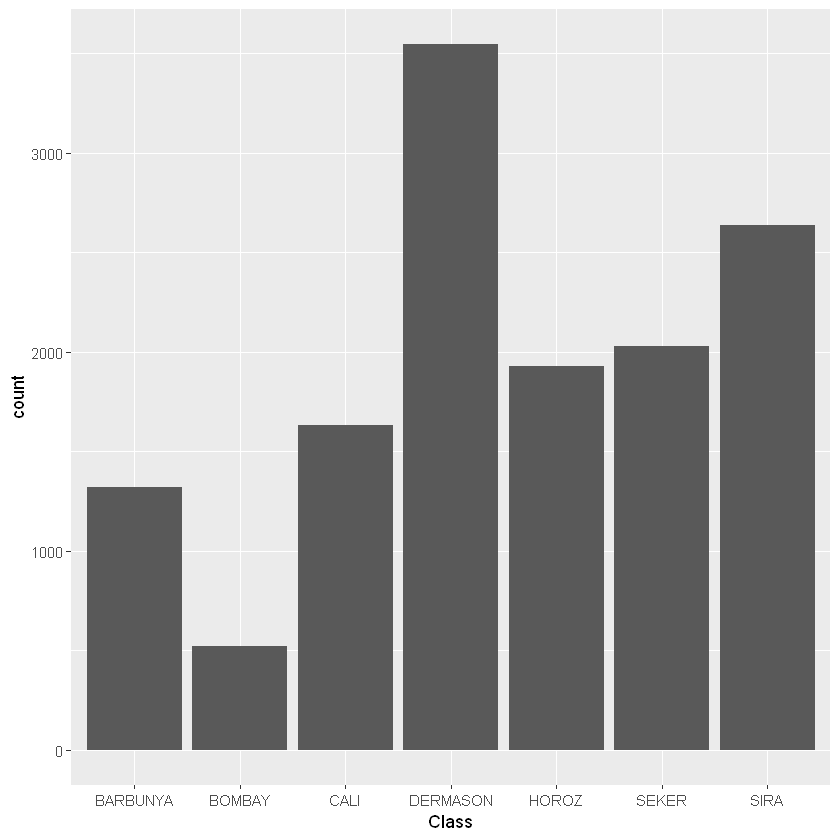

In [8]:
ggplot(data = data, aes(x = Class)) +
    geom_bar()

In [9]:
X = data[,c(1:16)]
y = data[,17]